In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
import glob
import matplotlib.patches as patches

In [3]:
##### EXAMPLES OF EACH TYPE OF HEARTBEAT

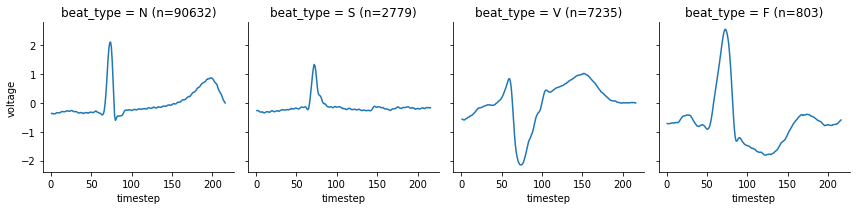

In [9]:
F_beat = pd.DataFrame()
S_beat = pd.DataFrame()
V_beat = pd.DataFrame()
N_beat = pd.DataFrame()

F_beat['voltage'] = pd.read_csv("F_beat.csv", header=None)
F_beat['beat_type'] = 'F'
F_beat['timestep'] = range(1,217)
S_beat['voltage'] = pd.read_csv("S_beat.csv", header=None)
S_beat['beat_type'] = 'S'
S_beat['timestep'] = range(1,217)
V_beat['voltage'] = pd.read_csv("V_beat.csv", header=None)
V_beat['beat_type'] = 'V'
V_beat['timestep'] = range(1,217)
N_beat['voltage'] = pd.read_csv("N_beat.csv", header=None)
N_beat['beat_type'] = 'N'
N_beat['timestep'] = range(1,217)

all_beats = pd.concat([N_beat, S_beat, V_beat, F_beat], axis=0)
#all_beats.columns = ['N', 'S', 'V', 'F']
all_beats
g = sns.FacetGrid(all_beats, col = "beat_type")
g.map(sns.lineplot, "timestep", "voltage")
ax = g.axes
ax[0,0].set_title("beat_type = N (n=90632)")
ax[0,1].set_title("beat_type = S (n=2779)")
ax[0,2].set_title("beat_type = V (n=7235)")
ax[0,3].set_title("beat_type = F (n=803)")
g.figure.savefig('Heartbeat_types_mitbih.png')

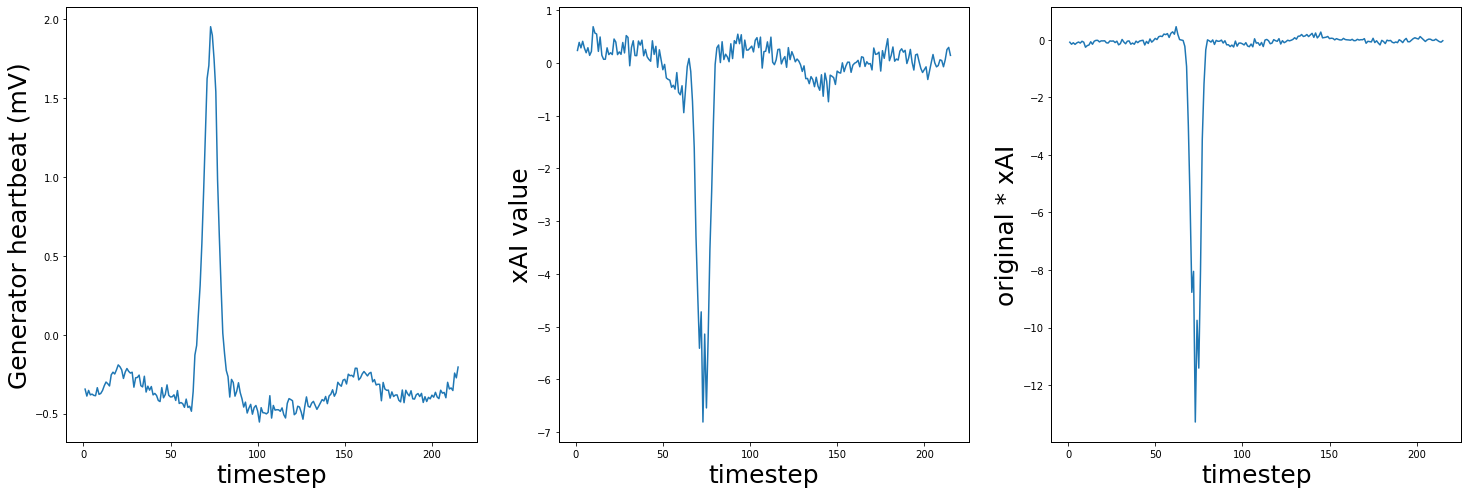

In [2]:
os.chdir("/Users/alainamahalanabis/Documents/GAN_XAI/src/")
xAI_res = pd.DataFrame()
xAI_res['timestep'] = range(1,217)
xAI_res['original'] = pd.read_csv("./xAI_output/F_beat_LSTM_input.csv")
xAI_res['xAI'] = pd.read_csv("./xAI_output/F_beat_adversary_LSTM.csv")
xAI_res['original_xAI'] = pd.read_csv("./xAI_output/input_times_ex_LSTM.csv")
xAI_res['gradient'] = pd.read_csv("./xAI_output/gradient_LSTM_F.csv")
xAI_res['new_gradient'] = pd.read_csv("./xAI_output/new_grad_LSTM_F.csv")
fig, axs = plt.subplots(ncols=3, figsize=(25, 8))
sns.lineplot(x='timestep', y='original', data=xAI_res, ax=axs[0])
axs[0].set_ylabel("Generator heartbeat (mV)", fontsize=25)
sns.lineplot(x='timestep', y='xAI', data=xAI_res, ax=axs[1])
axs[1].set_ylabel("xAI value", fontsize=25)
sns.lineplot(x='timestep',y='original_xAI', data=xAI_res, ax=axs[2])
axs[2].set_ylabel("original * xAI", fontsize=25)

for ax in fig.get_axes():
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth('1')
    ax.axis('on')
    ax.set_xlabel("timestep", fontsize=25)



In [74]:
os.chdir("/Users/alainamahalanabis/Documents/GAN_XAI/src/figures/")
fig.set_size_inches(40, 20)
fig.savefig('LSTM_Ig_xAI_1.png')

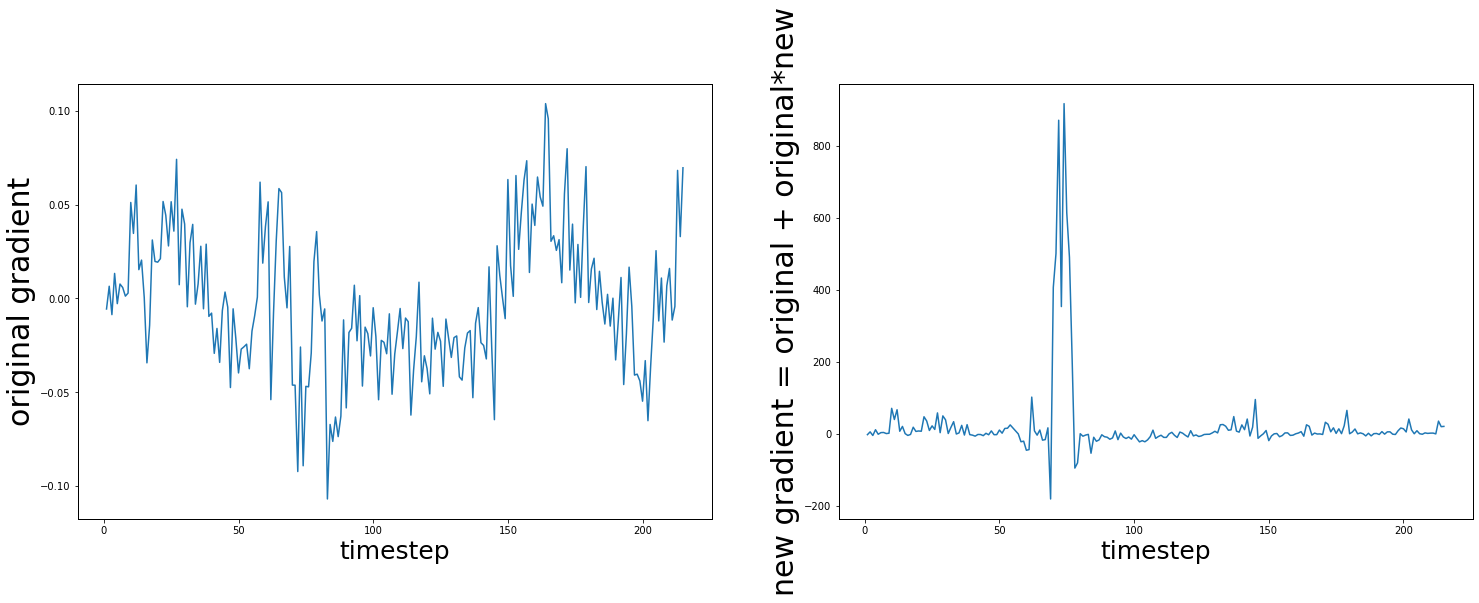

In [75]:
fig, axs = plt.subplots(ncols=2, figsize=(25, 8))
sns.lineplot(x='timestep',y='gradient', data=xAI_res, ax=axs[0])
axs[0].set_ylabel("original gradient", fontsize=30)
sns.lineplot(x='timestep',y='new_gradient', data=xAI_res, ax=axs[1])
axs[1].set_ylabel("new gradient = original + original*new", fontsize=30)

for ax in fig.get_axes():
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth('1')
    ax.axis('on')
    ax.set_xlabel("timestep", fontsize=25)

In [76]:
os.chdir("/Users/alainamahalanabis/Documents/GAN_XAI/src/figures/")
fig.set_size_inches(40, 20)
fig.savefig('LSTM_Ig_xAI_2.png')

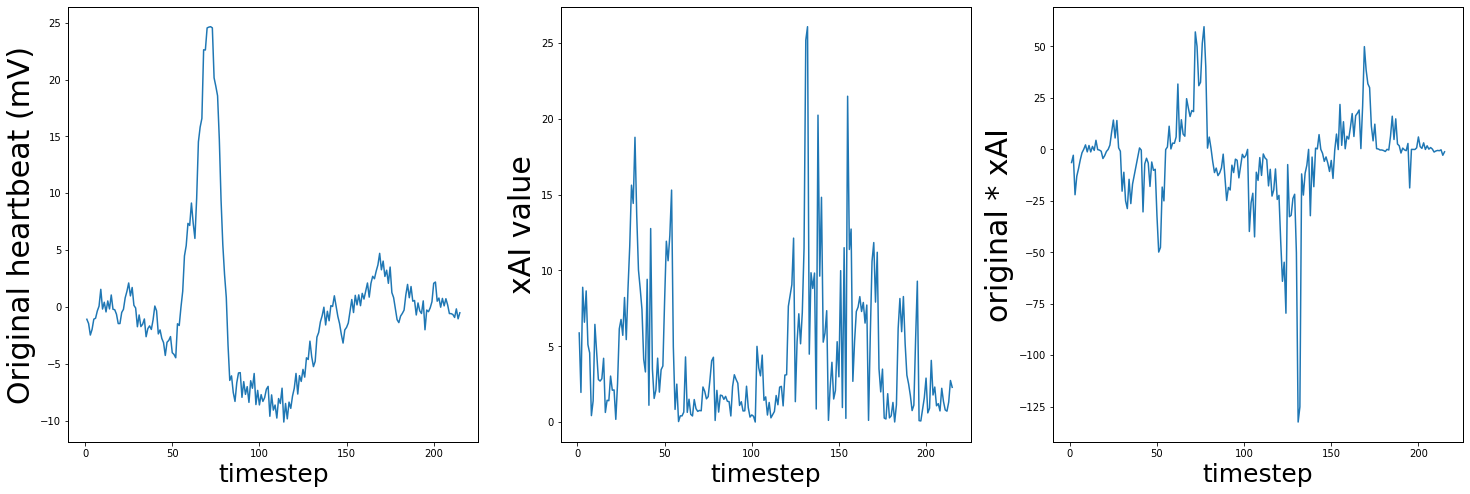

In [77]:
os.chdir("/Users/alainamahalanabis/Documents/GAN_XAI/src/")
xAI_res = pd.DataFrame()
xAI_res['timestep'] = range(1,217)
xAI_res['original'] = pd.read_csv("./xAI_output/F_beat_CNN_input.csv")
xAI_res['xAI'] = pd.read_csv("./xAI_output/F_beat_saliency_CNN.csv")
xAI_res['original_xAI'] = pd.read_csv("./xAI_output/input_ex_CNN.csv")
xAI_res['gradient'] = pd.read_csv("./xAI_output/gradient_CNN_F.csv")
xAI_res['new_gradient'] = pd.read_csv("./xAI_output/new_grad_CNN_F.csv")
fig, axs = plt.subplots(ncols=3, figsize=(25, 8))
sns.lineplot(x='timestep', y='original', data=xAI_res, ax=axs[0])
axs[0].set_ylabel("Original heartbeat (mV)", fontsize=30)
sns.lineplot(x='timestep', y='xAI', data=xAI_res, ax=axs[1])
axs[1].set_ylabel("xAI value", fontsize=30)
sns.lineplot(x='timestep',y='original_xAI', data=xAI_res, ax=axs[2])
axs[2].set_ylabel("original * xAI", fontsize=30)

for ax in fig.get_axes():
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth('1')
    ax.axis('on')
    ax.set_xlabel("timestep", fontsize=25)

In [78]:
os.chdir("/Users/alainamahalanabis/Documents/GAN_XAI/src/figures/")
fig.set_size_inches(40, 20)
fig.savefig("CNN_Saliency_xAI_1.png")

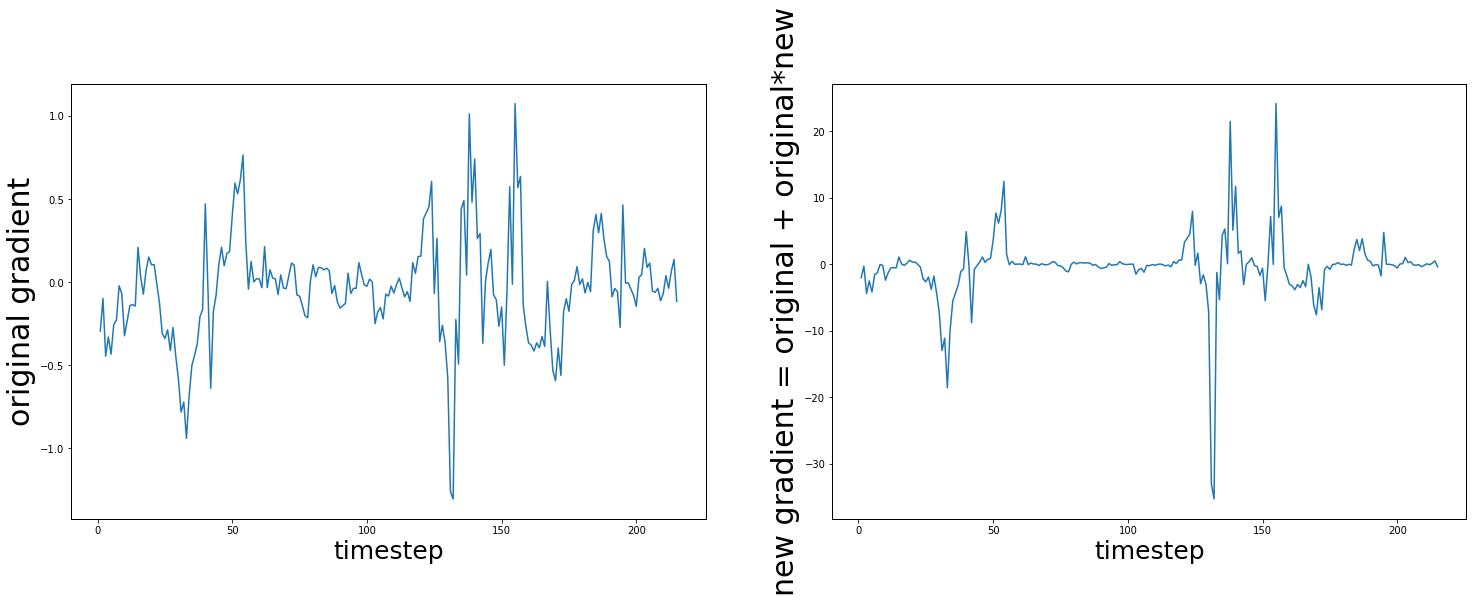

In [79]:
fig, axs = plt.subplots(ncols=2, figsize=(25, 8))
sns.lineplot(x='timestep',y='gradient', data=xAI_res, ax=axs[0])
axs[0].set_ylabel("original gradient", fontsize=30)
sns.lineplot(x='timestep',y='new_gradient', data=xAI_res, ax=axs[1])
axs[1].set_ylabel("new gradient = original + original*new", fontsize=30)

for ax in fig.get_axes():
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth('1')
    ax.axis('on')
    ax.set_xlabel("timestep", fontsize=25)

In [80]:
os.chdir("/Users/alainamahalanabis/Documents/GAN_XAI/src/figures/")
fig.set_size_inches(40, 20)
fig.savefig("CNN_Saliency_xAI_2.png")

In [48]:
os.chdir("/Users/alainamahalanabis/Documents/GAN_XAI/src/")
xAI_res = pd.DataFrame()
xAI_res = pd.read_csv("./xAI_output/grad1.csv")
xAI_res.shape
# fig, ax = plt.subplots(ncols=1, figsize=(20, 2))
# sns.heatmap(xAI_res, cbar=False, ax=ax)

(127, 50)